# Student Performance Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor



In [2]:
students = pd.read_csv("Student_Performance.csv")
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9,1.0,91.0
1,4.0,82.0,No,4,2.0,65.0
2,8.0,51.0,Yes,7,2.0,45.0
3,5.0,52.0,Yes,5,2.0,36.0
4,7.0,75.0,No,8,5.0,66.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9998 non-null   float64
 1   Previous Scores                   9999 non-null   float64
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  9997 non-null   float64
 5   Performance Index                 10000 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 468.9+ KB
None


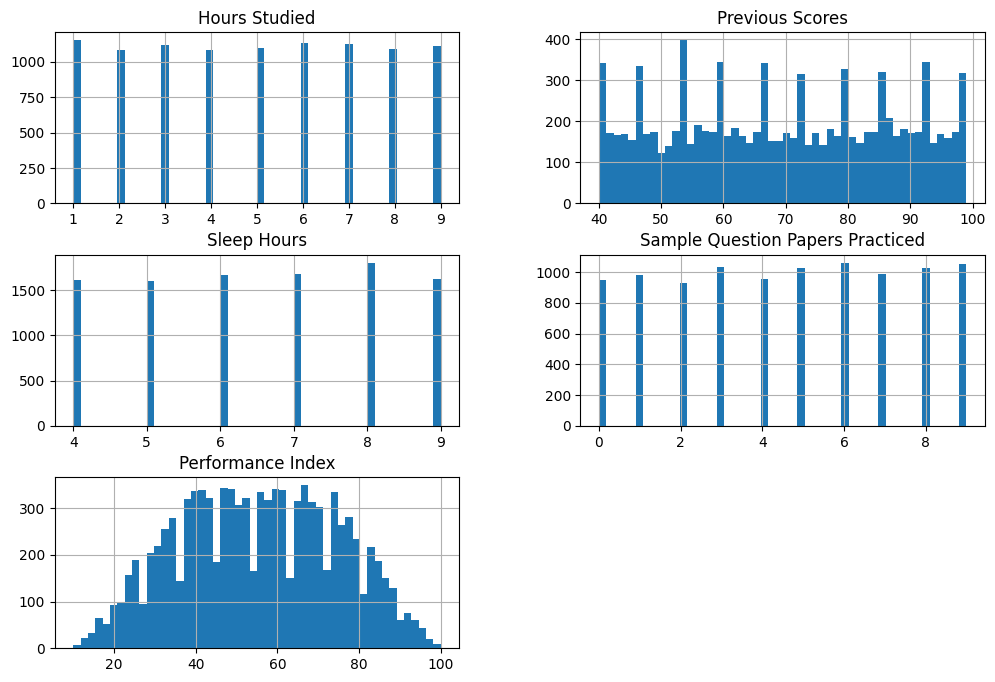

In [3]:
print(students.info())
students.hist(bins=50,figsize=(12,8))
plt.show()

In [4]:
train_set, test_set = train_test_split(students,test_size=0.2,random_state=42)

# Data Exploration

Performance Index                   1.000000
Previous Scores                     0.915185
Hours Studied                       0.373725
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043391
Name: Performance Index, dtype: float64


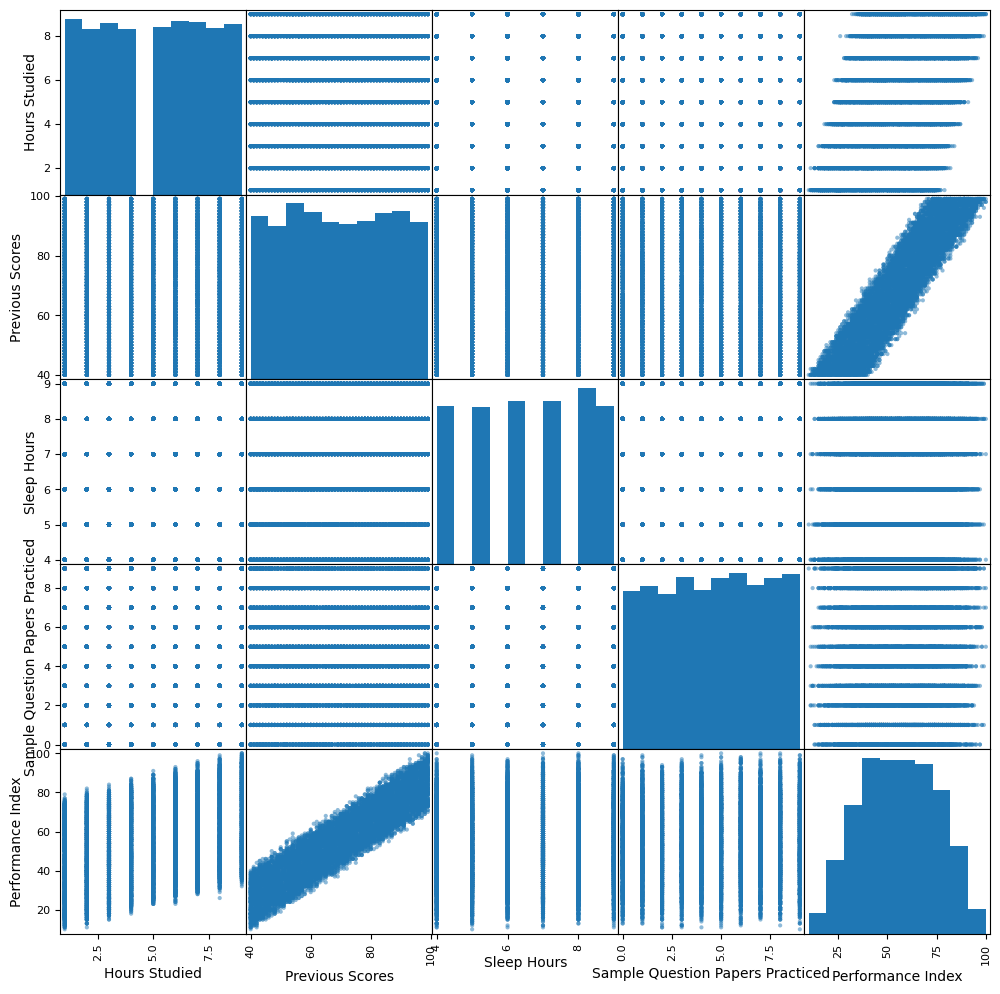

In [5]:
corr_matrix = students.select_dtypes(include=[np.number]).corr()
print(corr_matrix["Performance Index"].sort_values(ascending=False))

scatter_matrix(students,figsize=(12,12))
plt.show()

Transformation Pipeline

In [ ]:
num_pipeline = Pipeline([
    ("Simple Imputer",SimpleImputer(strategy="median")),
    ("standardize",StandardScaler())
])

cat_pipeline = Pipeline([
    ("Simple Imputer", SimpleImputer(strategy="most_frequent")),
    ("Encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("numbers", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("categories", cat_pipeline, make_column_selector(dtype_include=object))
])

In [7]:
students = train_set.drop("Performance Index",axis=1)
students_labels = train_set["Performance Index"].copy()


# Model Testing and exploration

In [ ]:
linear_reg = make_pipeline(preprocessing, LinearRegression())
linear_reg.fit(students,students_labels)

students_predictions = linear_reg.predict(students)
lin_rmses = -cross_val_score(linear_reg,students,students_labels, scoring="neg_root_mean_squared_error", cv=10)
lin_rmses


array([1.99581491, 2.09220769, 2.14151266, 2.00607289, 2.01260241,
       2.05251488, 2.02673994, 2.1084639 , 2.07558432, 2.00651236])

In [9]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=4))
tree_reg.fit(students,students_labels)

tree_predictions = tree_reg.predict(students)
tree_rmses = -cross_val_score(tree_reg, students, students_labels, scoring="neg_root_mean_squared_error", cv=10)
tree_rmses

array([2.93974796, 3.05598797, 3.01195534, 2.97876163, 3.08102391,
       2.94885807, 3.07275211, 3.03860577, 2.9794085 , 3.04071332])

In [13]:
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(students,students_labels)

forest_predictions = forest_reg.predict(students)
forest_rmses = -cross_val_score(forest_reg,students,students_labels,scoring="neg_root_mean_squared_error", cv=10)
forest_rmses

array([2.30173822, 2.39025929, 2.43762219, 2.32428843, 2.28830554,
       2.36063766, 2.38508365, 2.36232488, 2.36408042, 2.32871817])

In [ ]:
neural_net_reg = make_pipeline(preprocessing,MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500))
neurlal_net_rmses = -cross_val_score(neural_net_reg,students,students_labels,scoring="neg_root_mean_squared_error", cv=10)
neurlal_net_rmses

array([2.07175503, 2.14144412, 2.16771351, 2.0253406 , 2.04534884,
       2.06413039, 2.0621703 , 2.15107601, 2.0865439 , 2.03451416])

# Testing

In [12]:
# The linear regression model had the lowest average rmse, so we will use that to test
x_test = test_set.drop("Performance Index", axis=1)
y_test = test_set["Performance Index"].copy()

prediction = linear_reg.predict(x_test)

rmse = root_mean_squared_error(y_test, prediction)
rmse

2.042911743942464